<a href="https://colab.research.google.com/github/Mayzelle/LUNG_CANCER-DISEASE-ANALYSIS/blob/main/Lung_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lung Cancer Prediction Using Maching Learning

By ( Mayzelle )


Project Introduction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# locally importing the dataset from our local computer
from google.colab import files 
upload = files.upload()

Saving lung_cancer_data.csv to lung_cancer_data.csv


In [ ]:
data = pd.read_csv('lung_cancer_data.csv')


In [ ]:
data.head(15)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
data.sample(6)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
80,F,58,1,1,1,1,1,2,1,1,1,1,2,1,1,NO
248,F,64,2,2,1,2,2,2,2,2,1,2,2,1,1,YES
146,M,51,1,2,1,1,2,2,2,2,2,2,2,1,2,YES
199,F,55,2,1,1,2,2,2,2,2,2,1,1,2,2,YES
45,M,72,2,2,2,2,2,2,1,2,2,2,2,2,2,YES
224,F,62,2,1,1,2,1,2,2,2,2,2,1,2,2,YES


In [ ]:
data.shape

(309, 16)

In [ ]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
data.duplicated().sum()

33

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
""" After executing these lines of code, the 'GENDER' and 'LUNG_CANCER' columns of the 'data'
 DataFrame will contain numerical labels instead of the original categorical values. 
 This allows the data to be used in machine learning models that require numerical input. """
 
data['GENDER']= label_encoder.fit_transform(data['GENDER'])
data['LUNG_CANCER']= label_encoder.fit_transform(data['LUNG_CANCER'])

# the dtype for Gender(F,M) obj, was replaced with int 0 and 1 respectively.

In [ ]:
# displaying information about the DataFrame to confirm our conversion of the Gender field
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    i

In [ ]:
data.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [ ]:
data.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [ ]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
data_new = data[['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING',
                 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

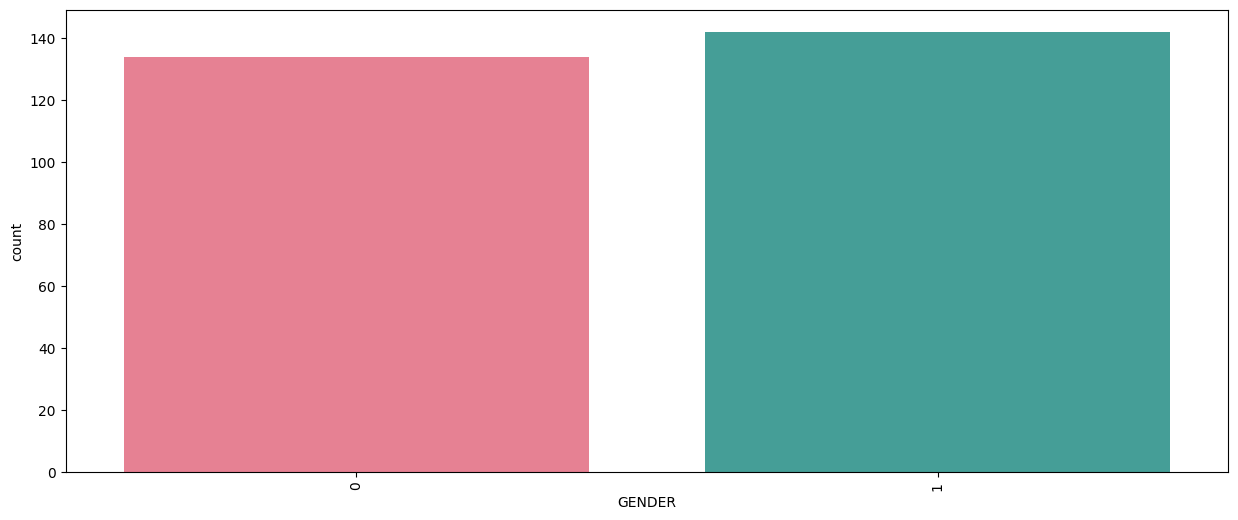

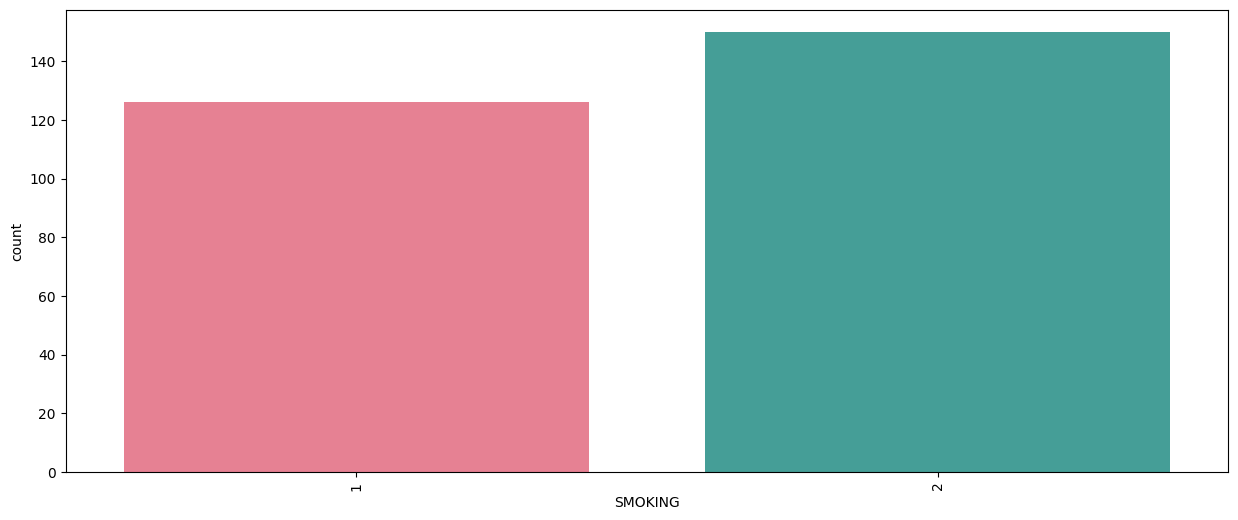

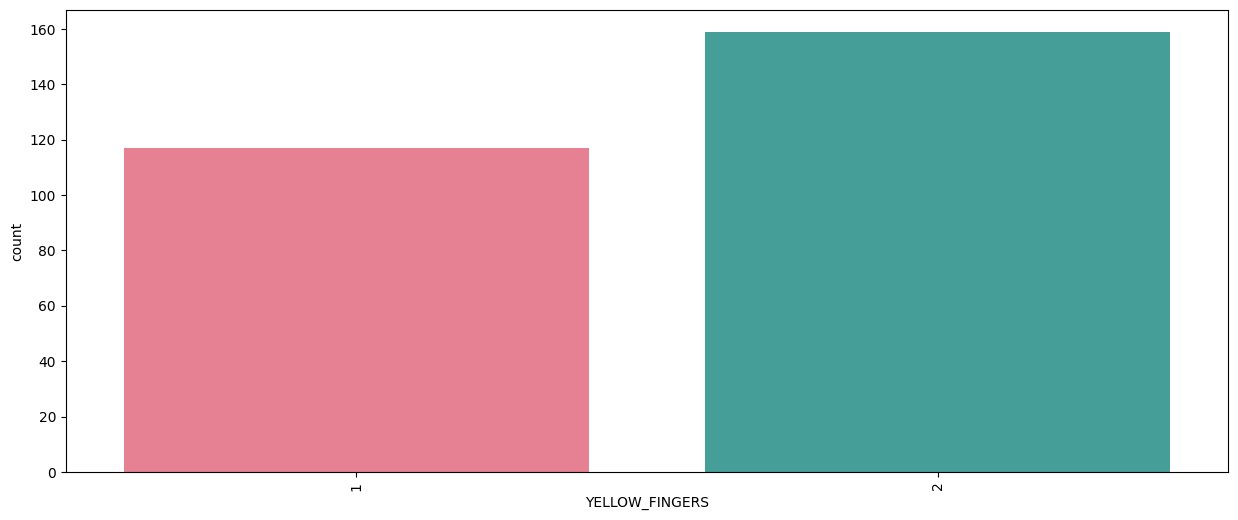

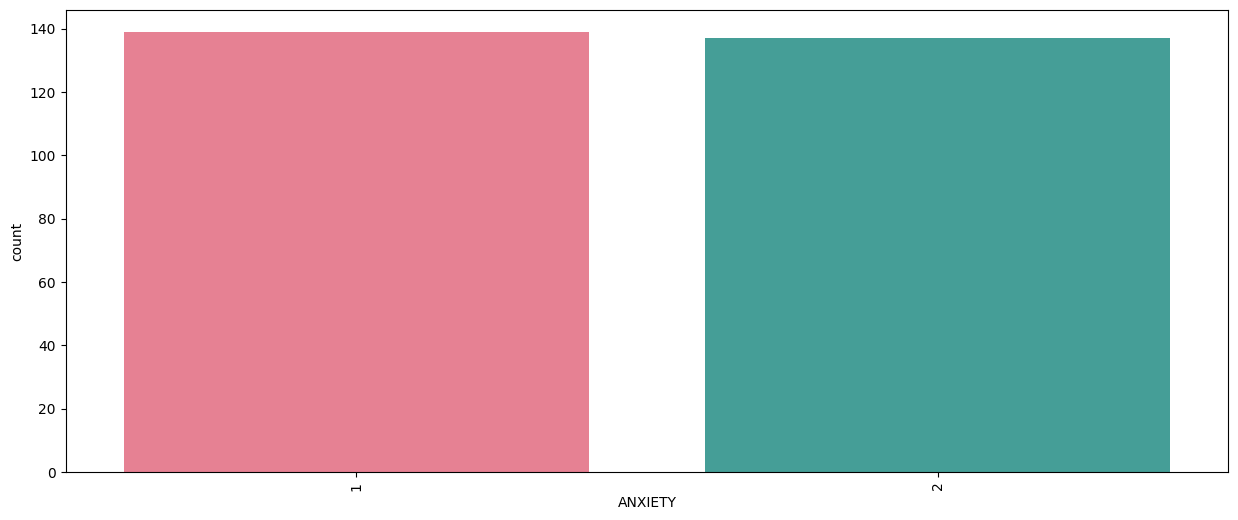

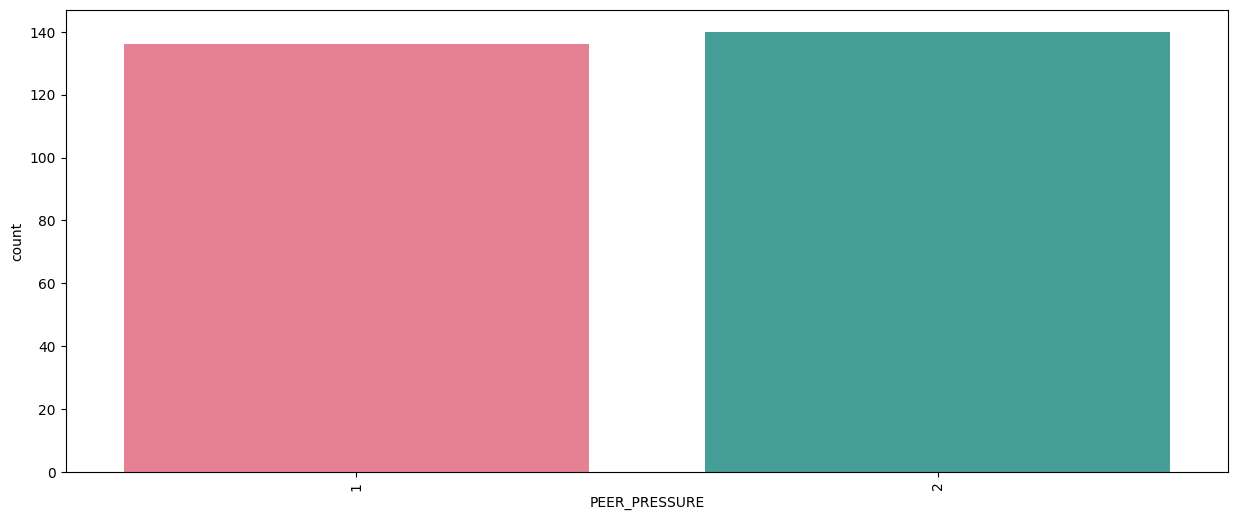

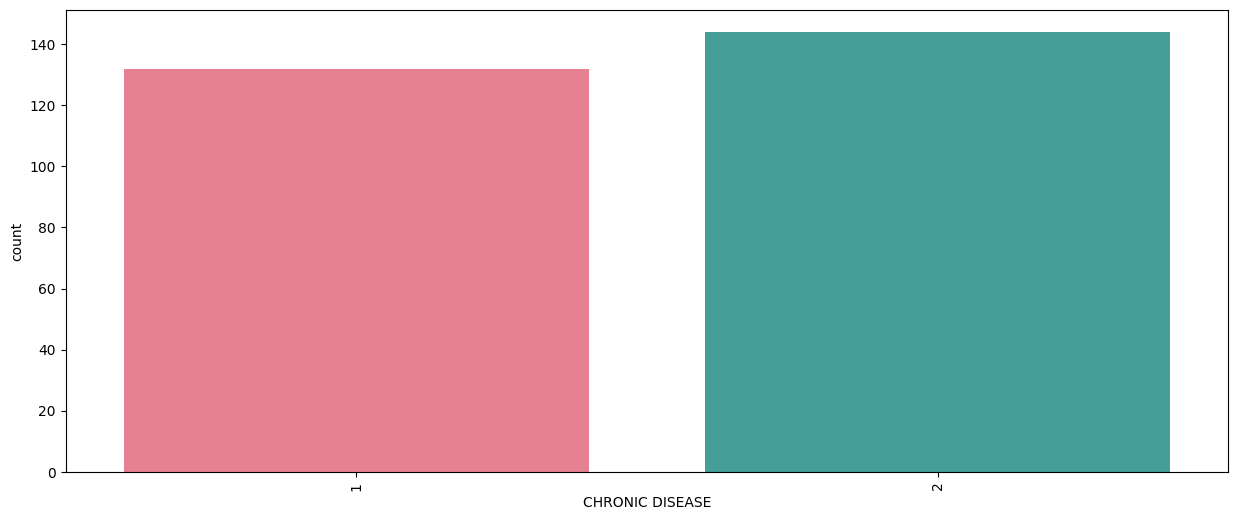

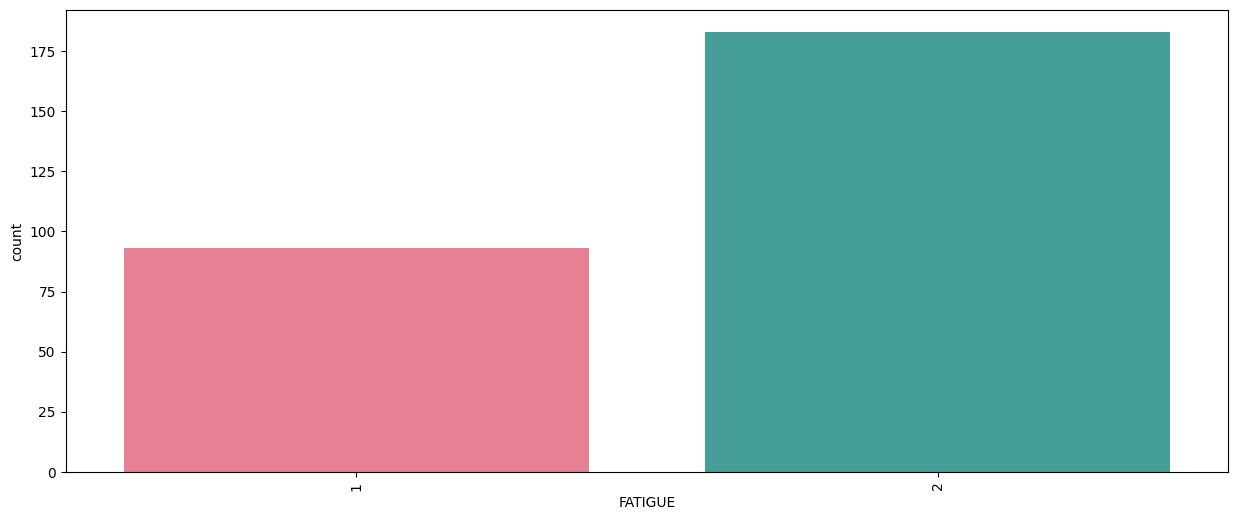

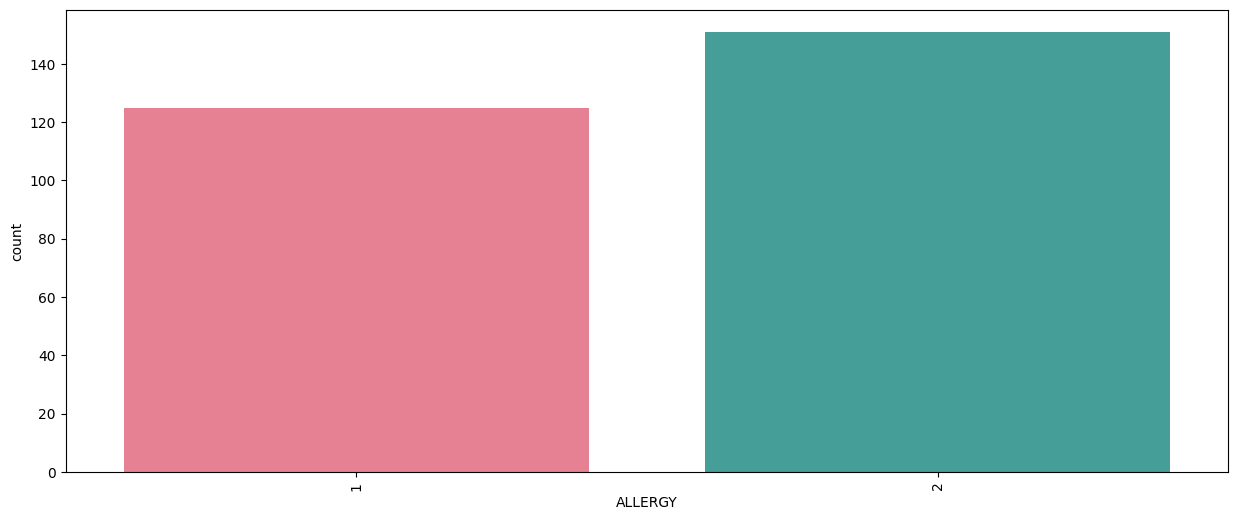

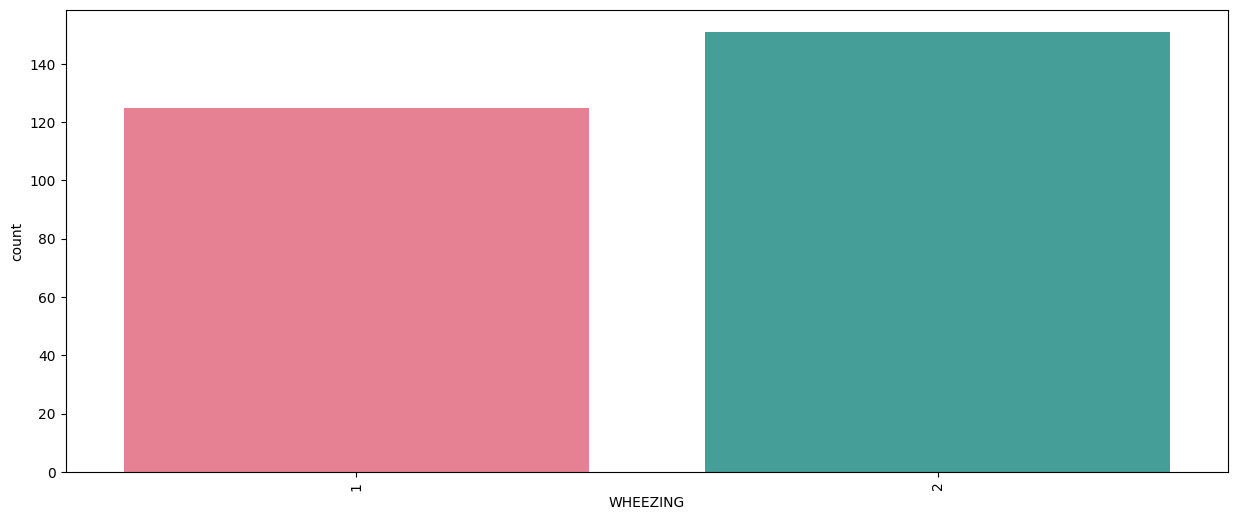

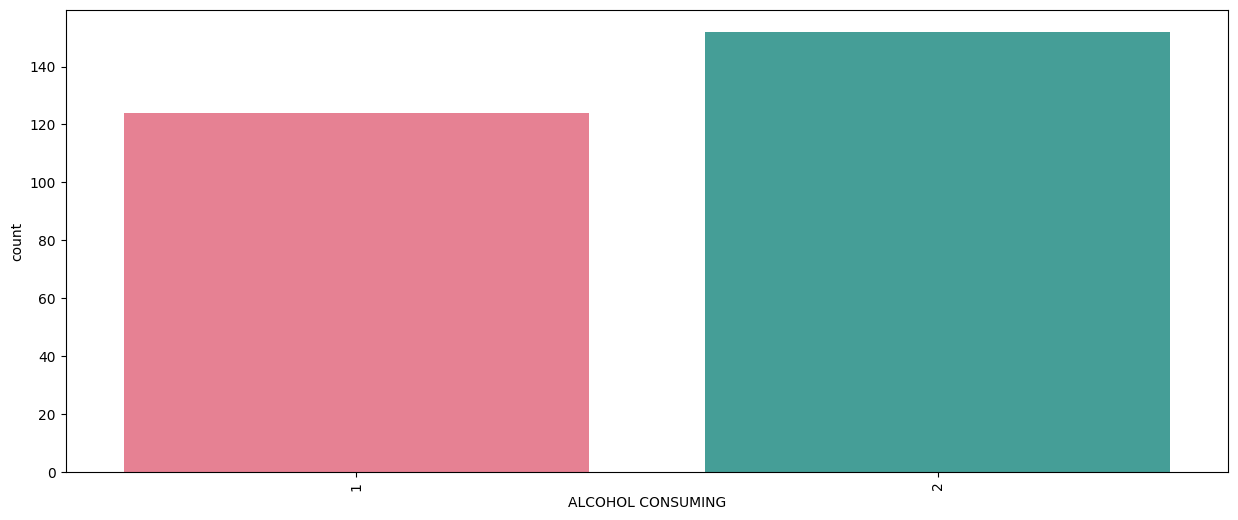

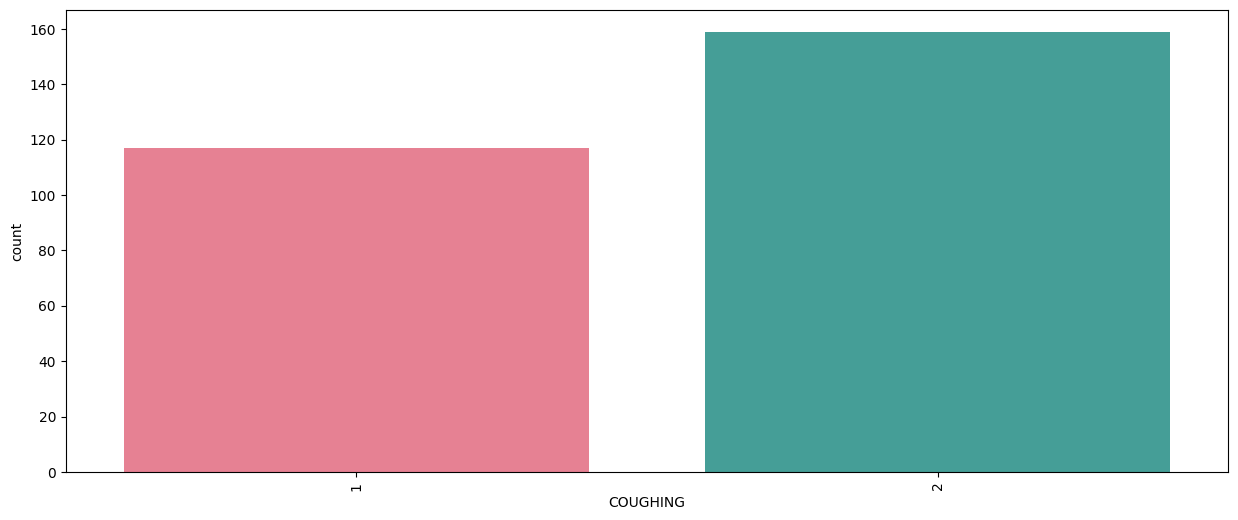

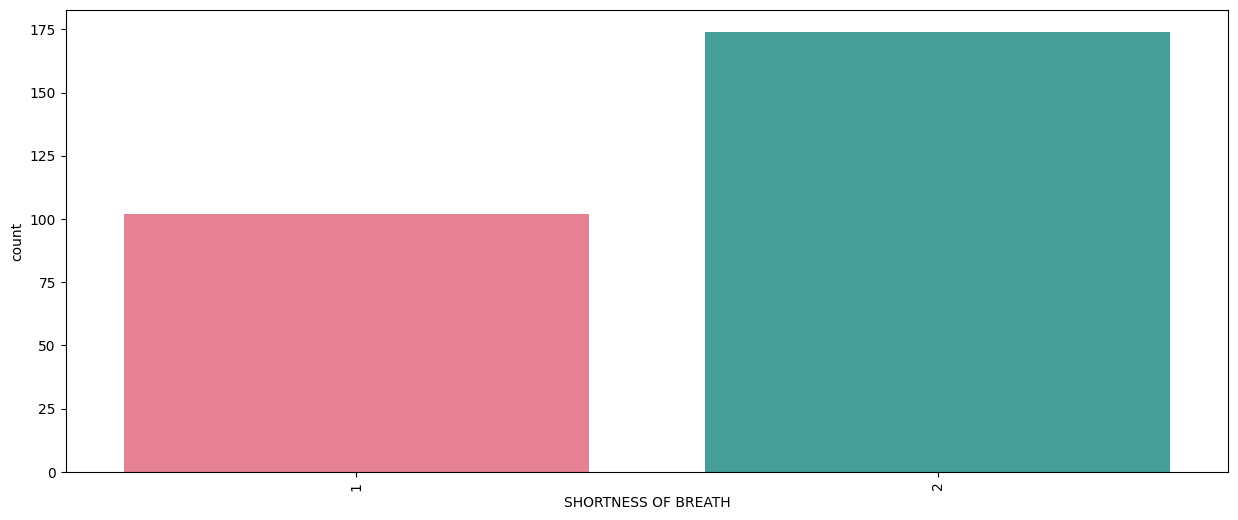

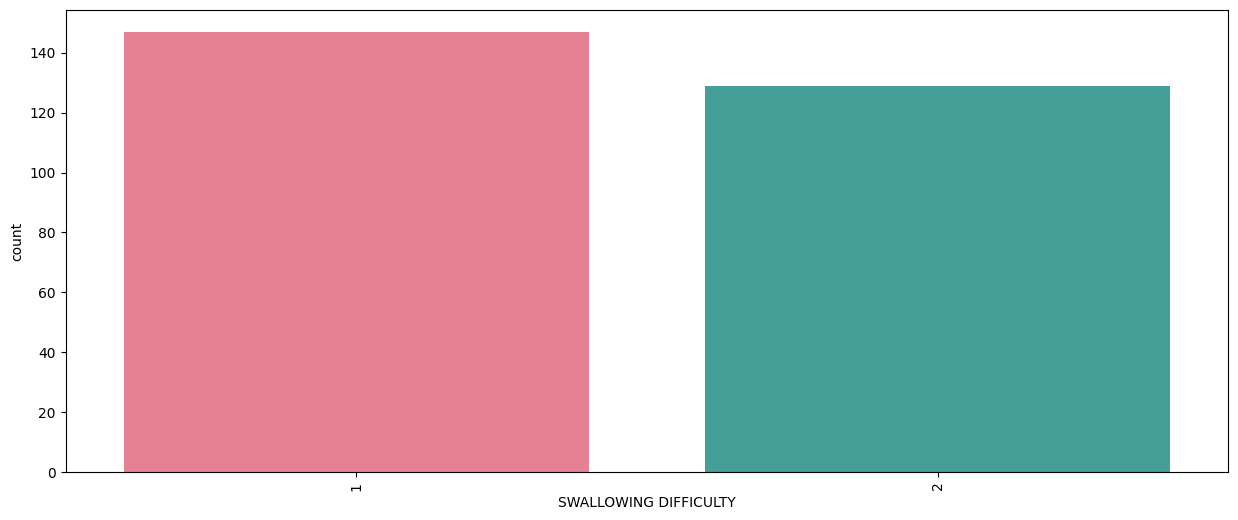

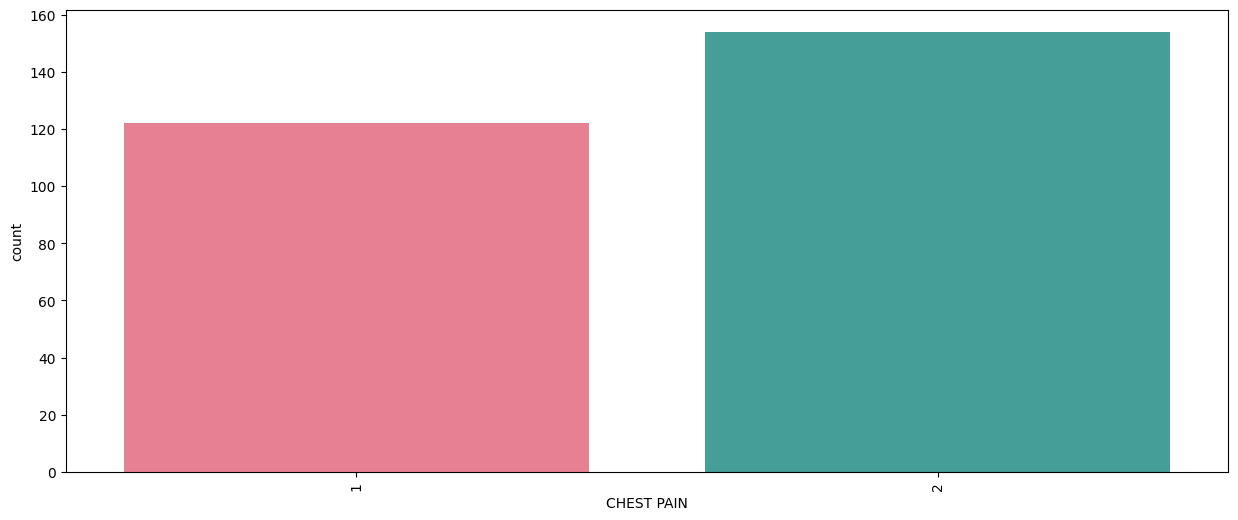

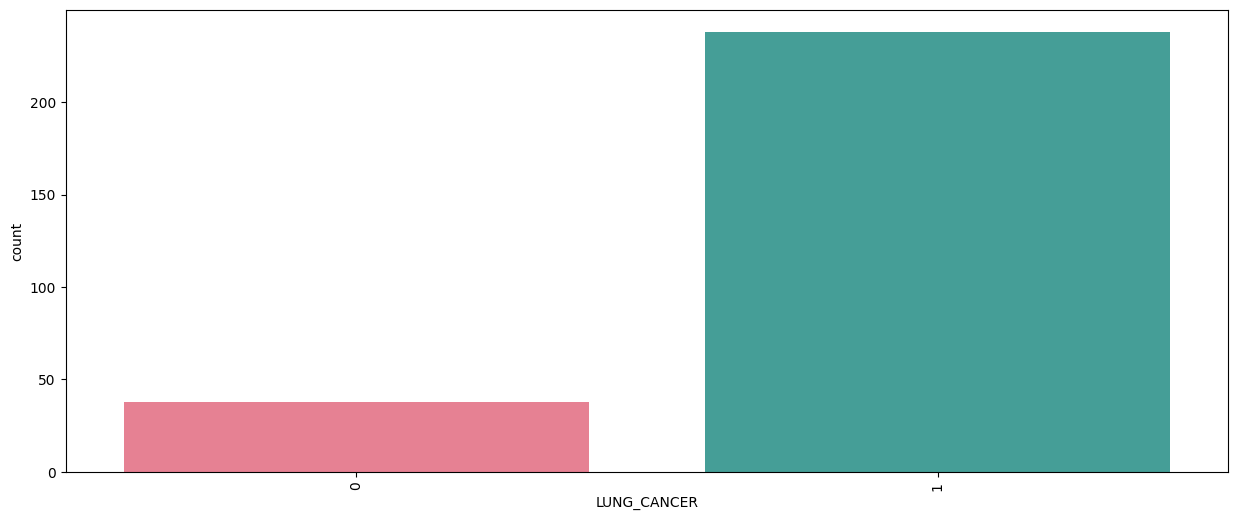

In [ ]:
# this function plots a count plot of the Gender column against the column values in our data_new dataframe.
# NB : as stated in the preceding cells, the 'Gender' columns(M,F) values are now represented by 1 and 0 respectively.
for i in data_new.columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, data=data_new, palette='husl')
    plt.xticks(rotation=90)


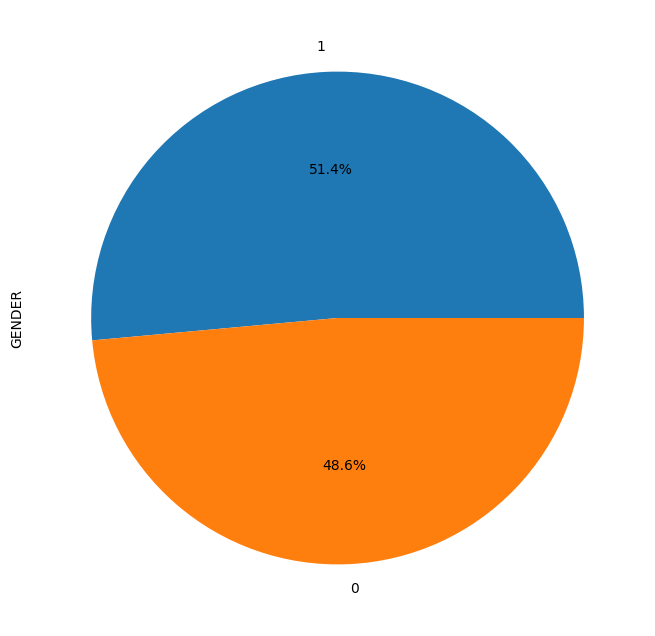

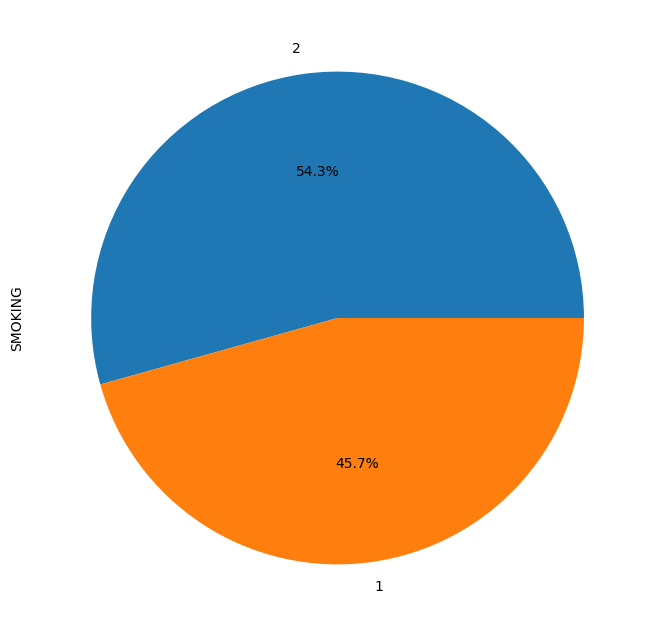

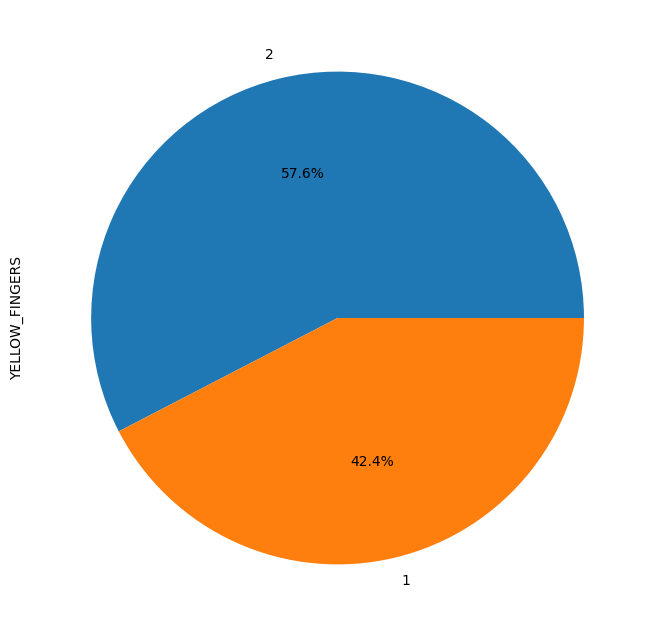

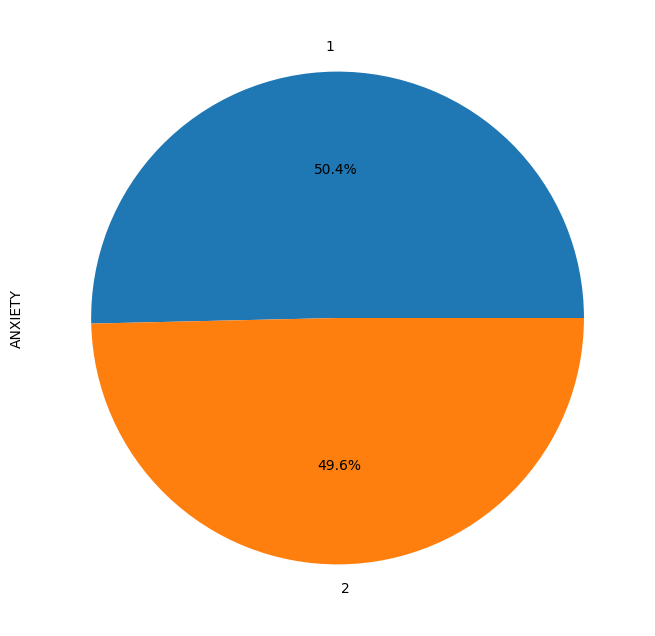

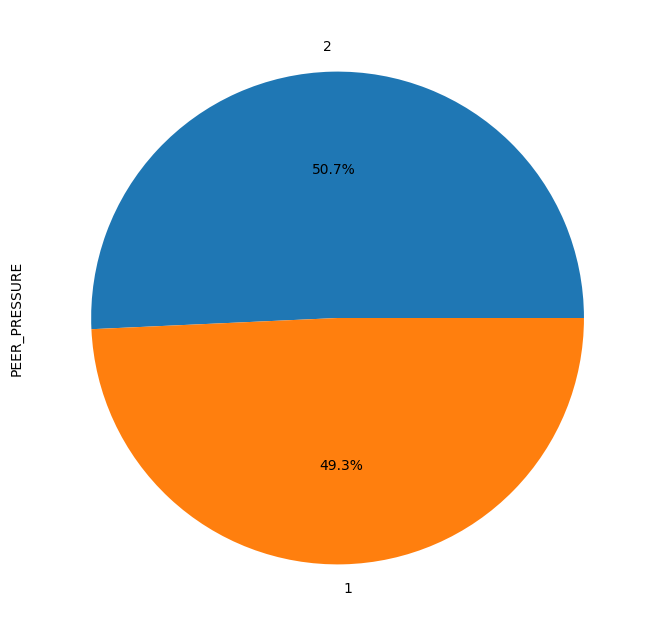

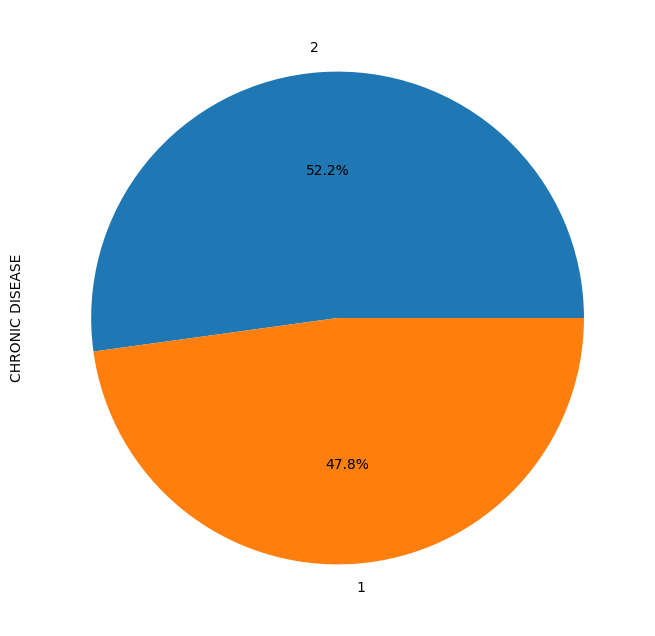

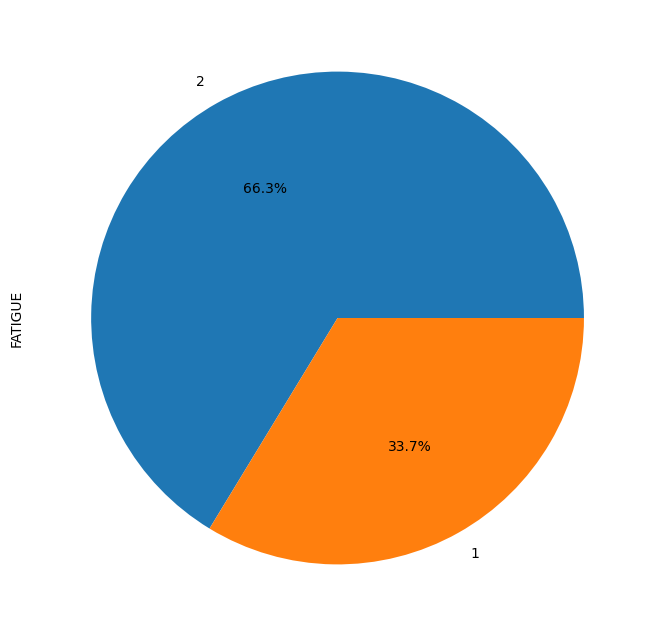

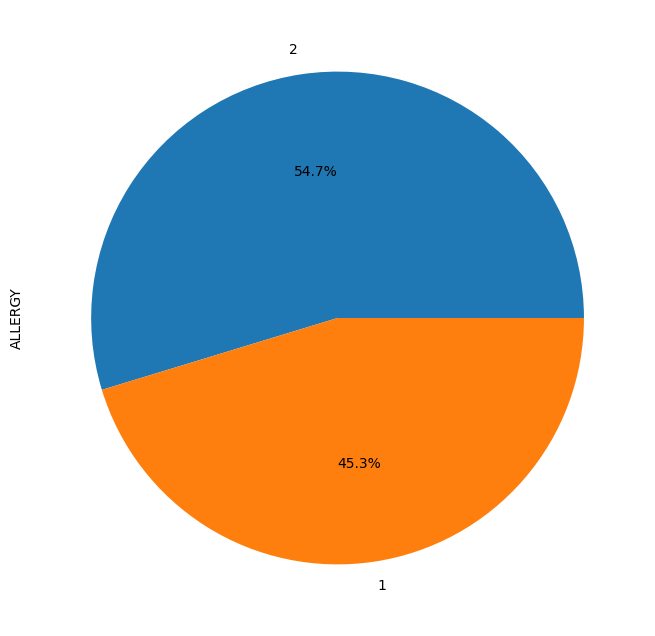

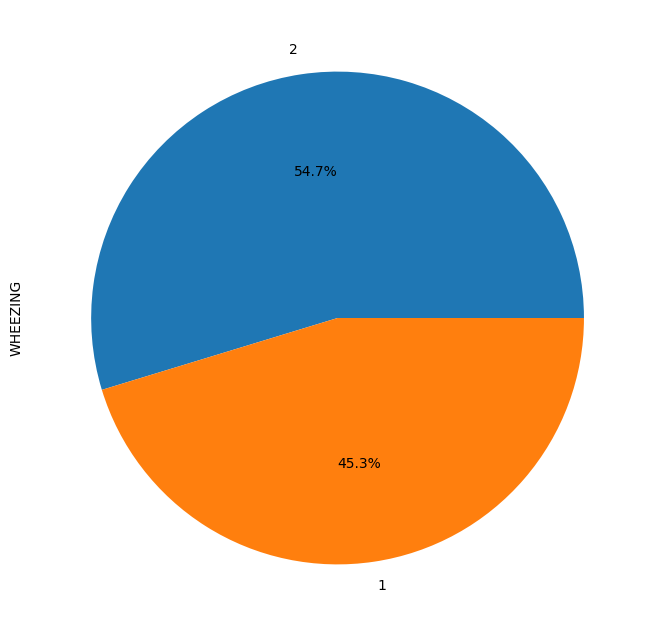

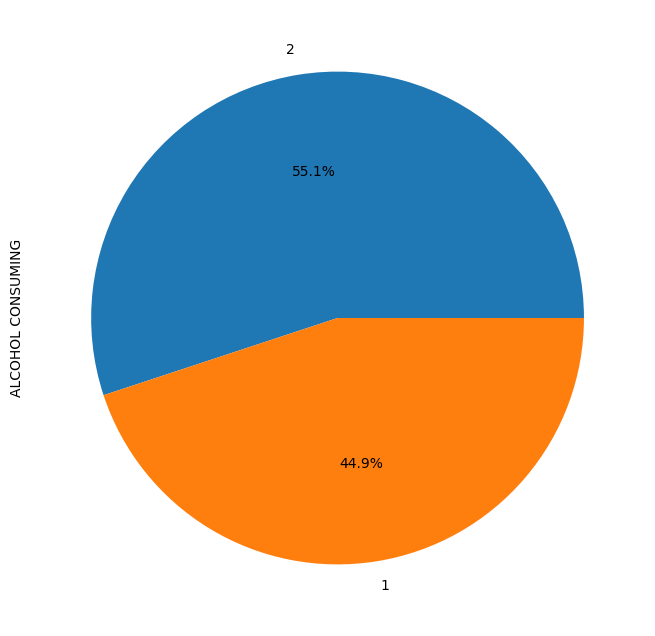

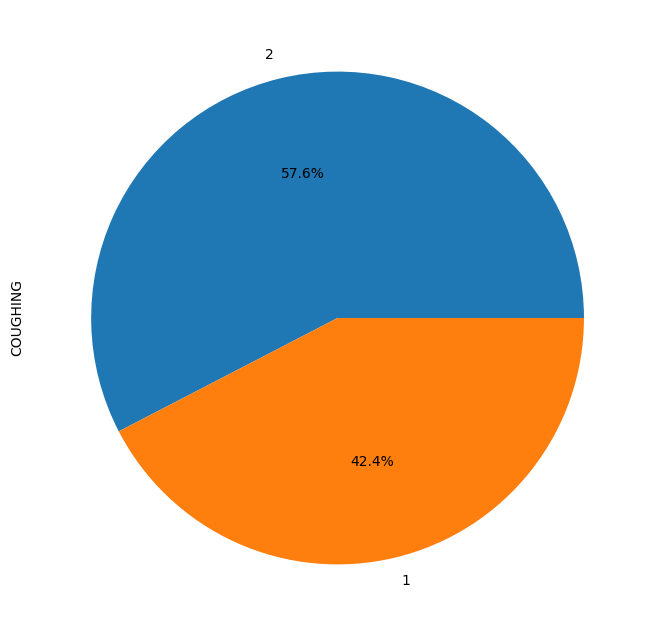

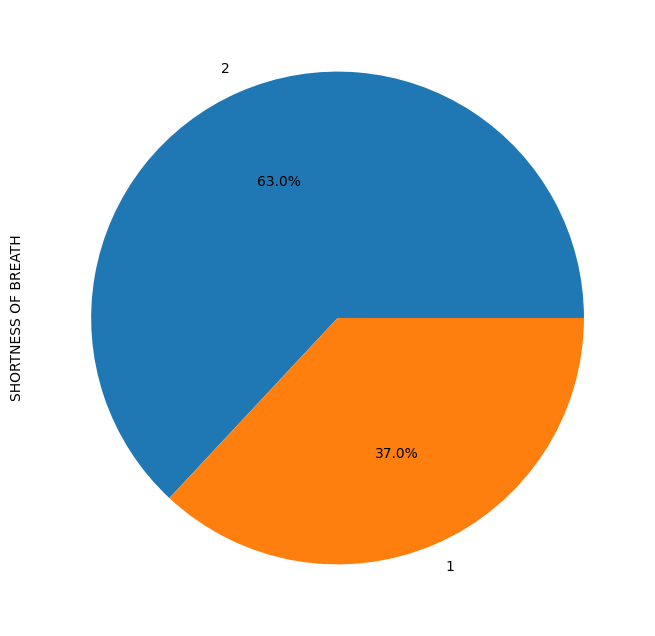

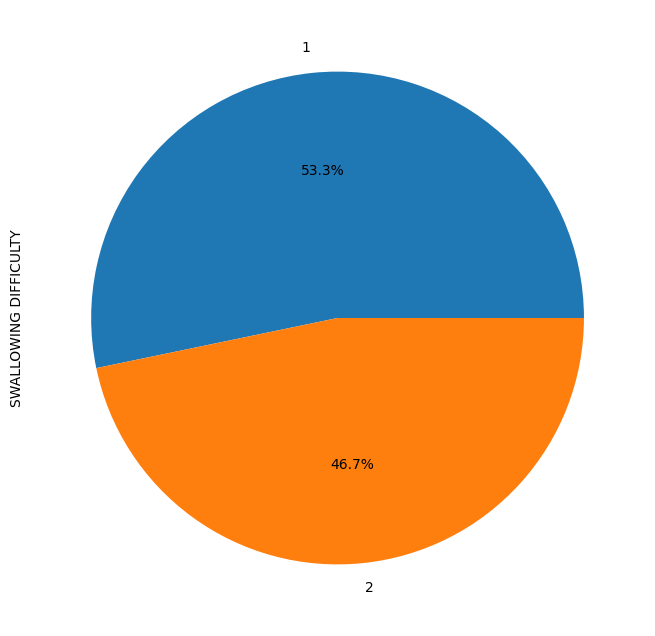

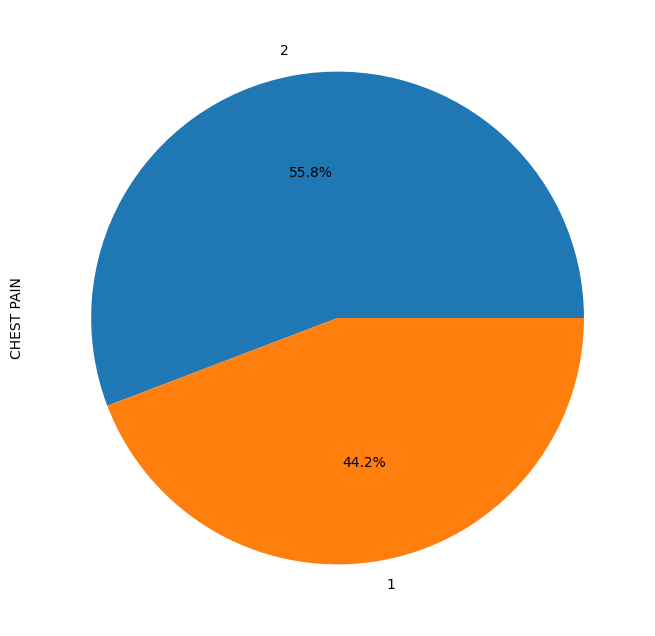

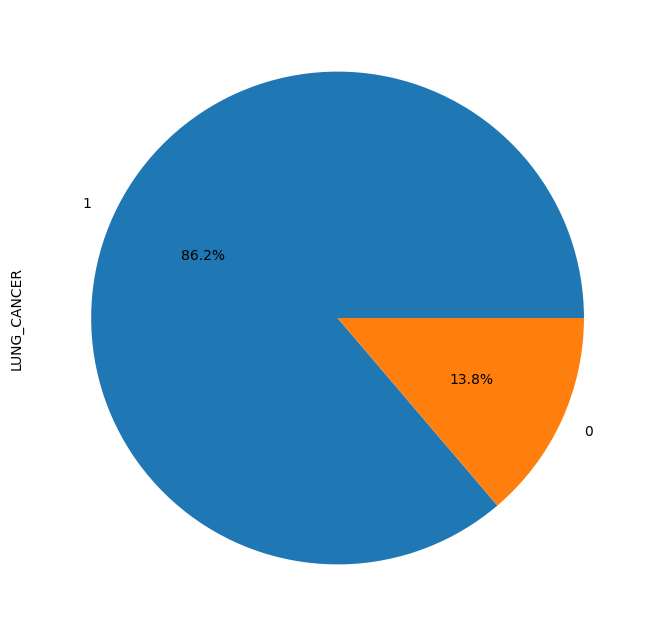

In [ ]:
for i in data_new.columns:
  data_new[i].value_counts().plot(kind='pie',
                                  figsize=(8, 8),
                                  autopct='%1.1f%%')
  plt.xticks(rotation = 90)
  plt.show()

In [ ]:
data_new['LUNG_CANCER'].unique()

array([1, 0])

In [ ]:
data_new['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

In [ ]:
100. *data_new.LUNG_CANCER.value_counts() / len(data_new.LUNG_CANCER)

1    86.231884
0    13.768116
Name: LUNG_CANCER, dtype: float64

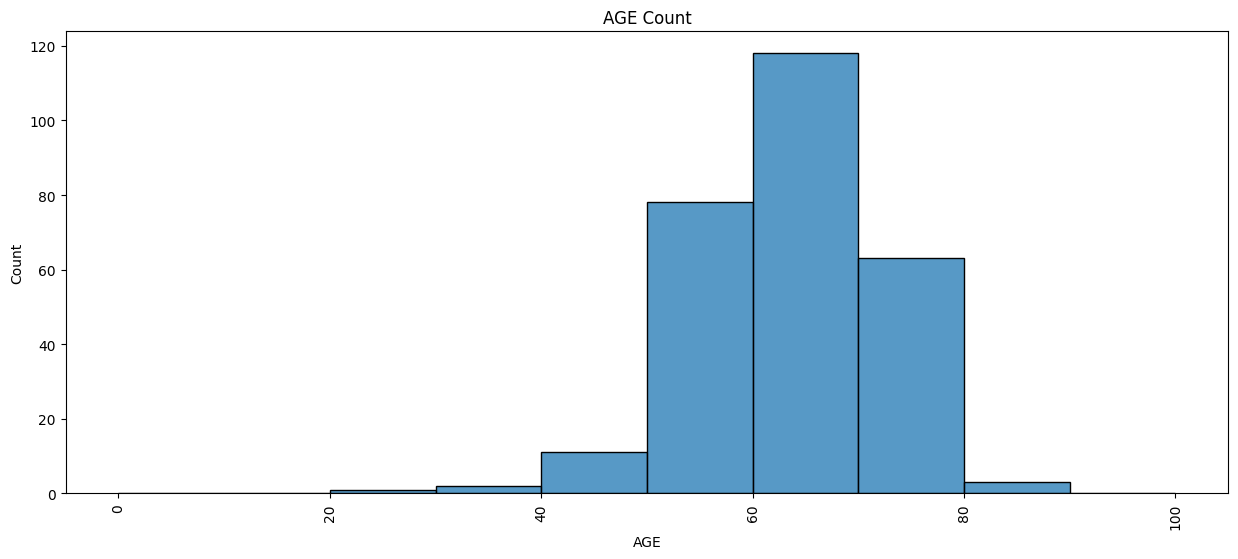

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])  # Specifying custom bin edges
plt.xticks(rotation=90)
plt.title("AGE Count")
plt.show()


In [ ]:
data_new['GENDER'].unique()

array([1, 0])

In [ ]:
data_new['GENDER'].value_counts()

1    142
0    134
Name: GENDER, dtype: int64

In [ ]:
#calculateing the percentage distribution of the 'GENDER' column in the 'data_new' DataFrame.
100. *data_new.GENDER.value_counts() / len(data_new.GENDER)

1    51.449275
0    48.550725
Name: GENDER, dtype: float64

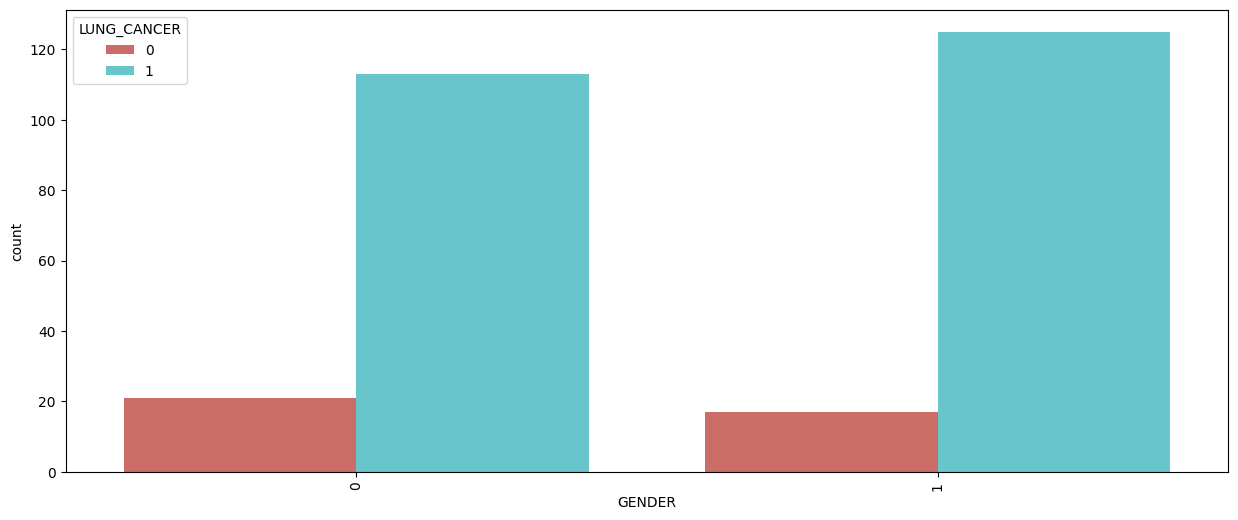

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='GENDER',data=data_new,hue='LUNG_CANCER',
              palette='hls')
plt.xticks(rotation = 90)
plt.show()


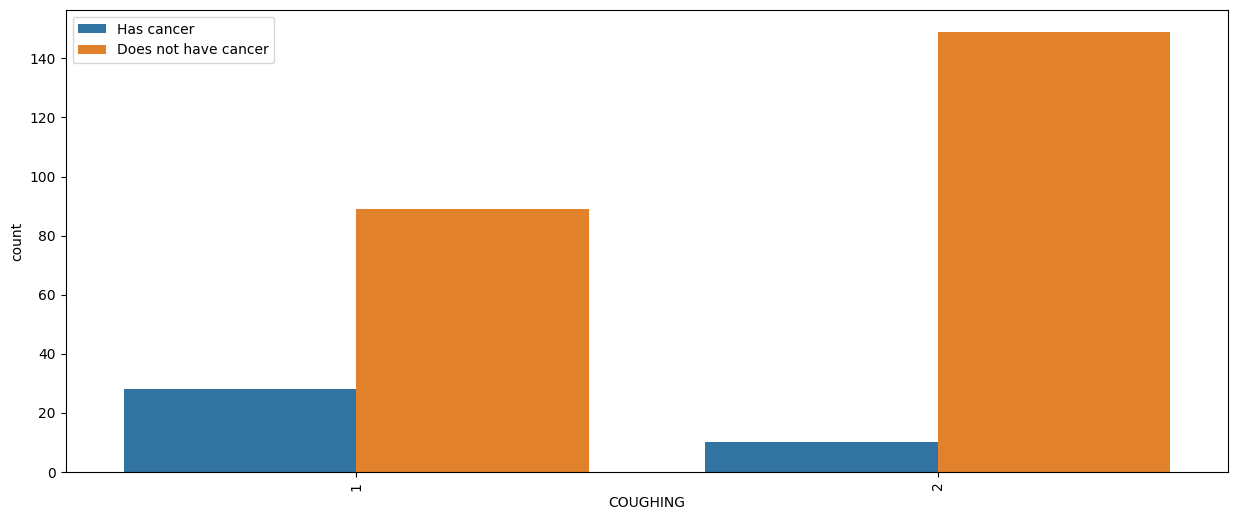

In [ ]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=data_new,x='COUGHING',hue='LUNG_CANCER') 
plt.legend(["Has cancer", 'Does not have cancer']) 
plt.xticks(rotation = 90)
plt.show()

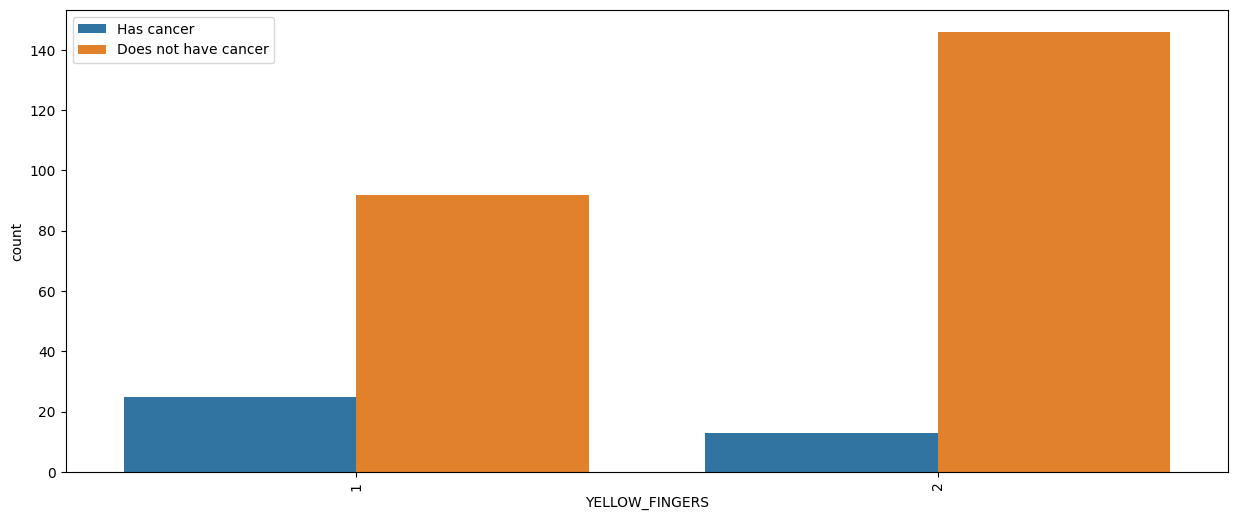

In [ ]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=data_new,x='YELLOW_FINGERS',hue='LUNG_CANCER') 
plt.legend(["Has cancer", 'Does not have cancer'])
plt.xticks(rotation = 90)
plt.show()


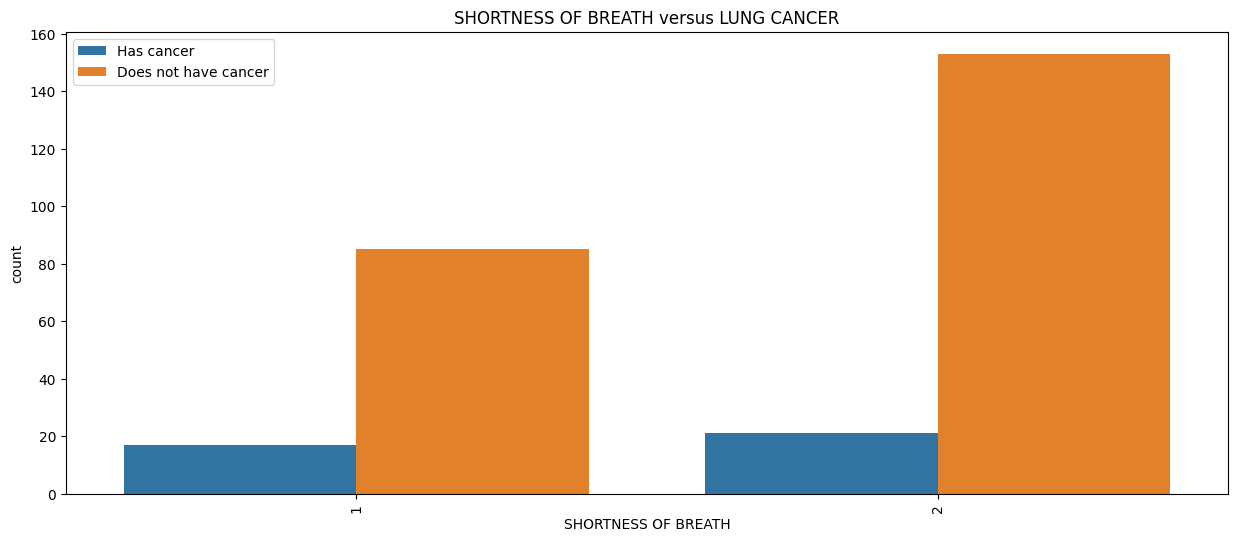

In [ ]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=data_new,x='SHORTNESS OF BREATH',hue='LUNG_CANCER') 
plt.legend(["Has cancer", 'Does not have cancer'])
plt.title("SHORTNESS OF BREATH versus LUNG CANCER")
plt.xticks(rotation = 90)
plt.show()

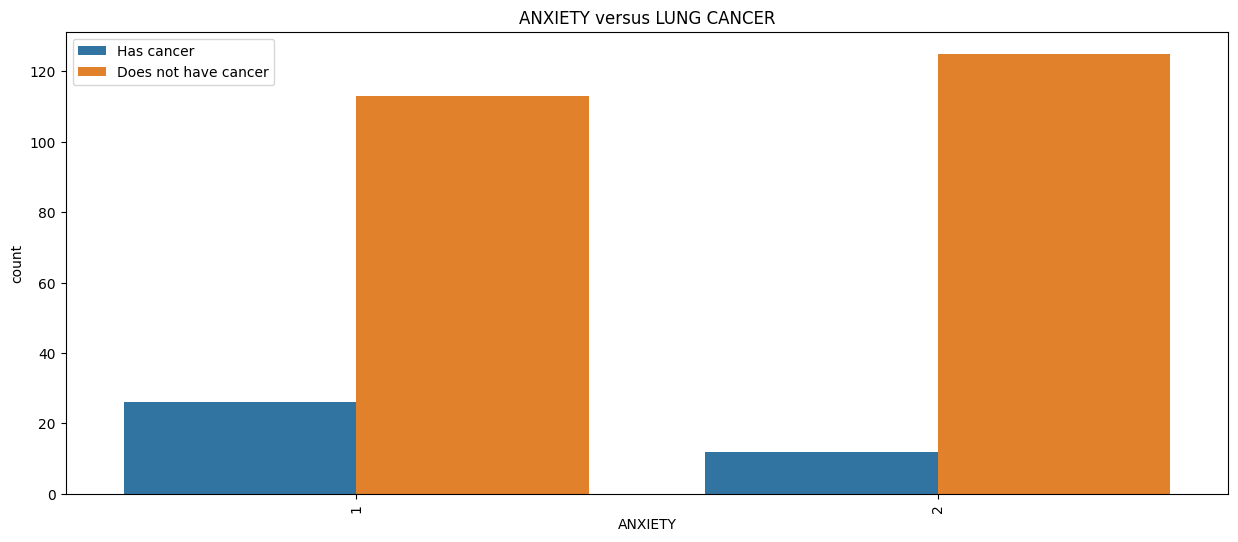

In [ ]:
plt.figure(figsize=(15,6)) 
sns.countplot(data=data_new,x='ANXIETY',hue='LUNG_CANCER') 
plt.legend(["Has cancer", 'Does not have cancer'])
plt.title("ANXIETY versus LUNG CANCER")
plt.xticks(rotation = 90)
plt.show()

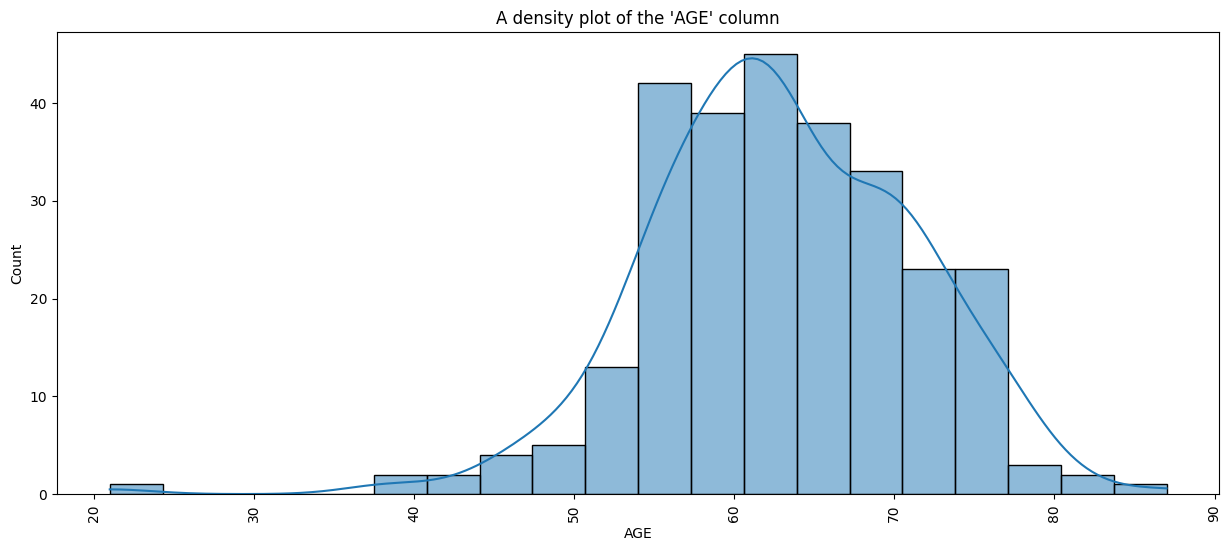

In [ ]:
# Here we create a density plot of the 'AGE' column estimating the underlying probability density function of the data
plt.figure(figsize=(15, 6))
sns.histplot(data['AGE'], bins=20, kde=True)  # Create a histogram with 20 bins and overlay the density plot
plt.xticks(rotation=90)
plt.title("A density plot of the 'AGE' column")
plt.show()


In [ ]:
cormat = data_new.corr()
cormat

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
SMOKING,0.041131,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,0.434264,-0.052771,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.163370,-0.000635,0.310767,0.294422


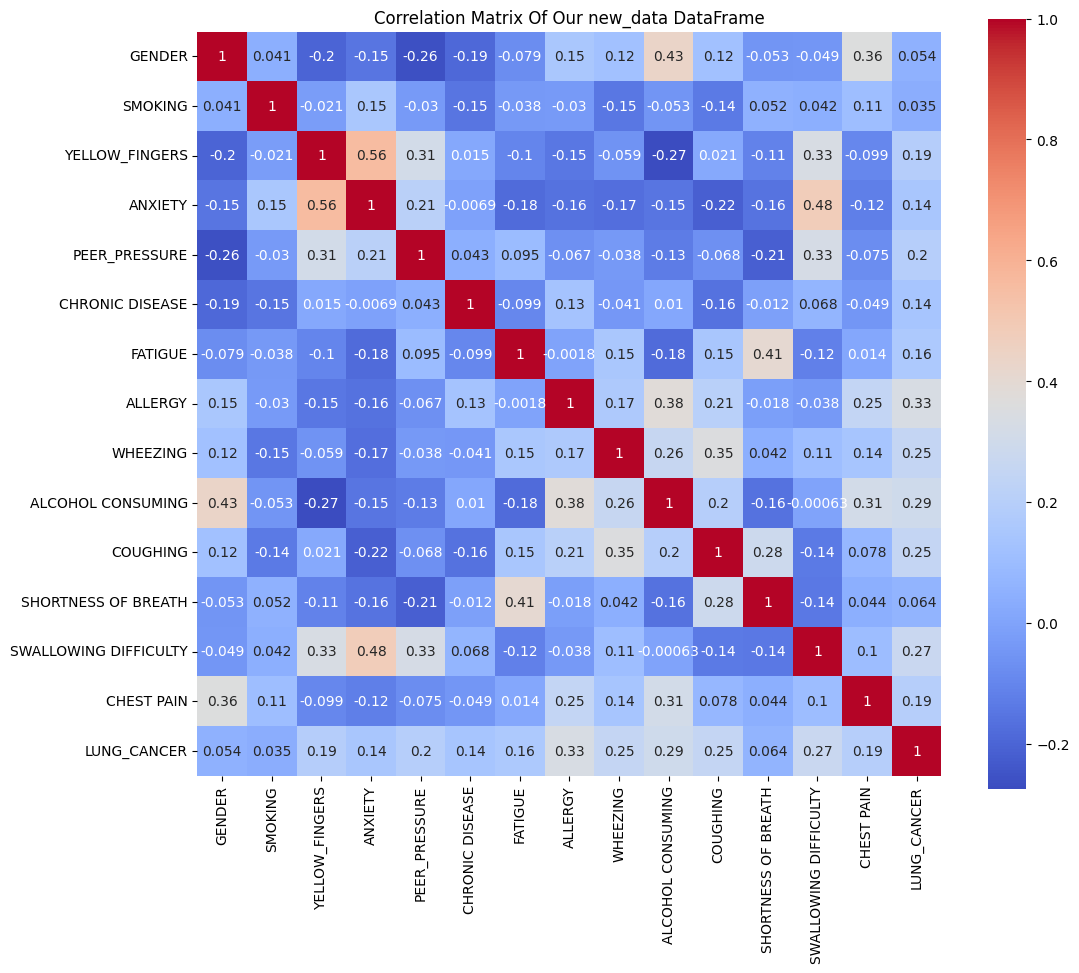

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(cormat, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Of Our new_data DataFrame')
plt.show()


In [ ]:
x = data_new.drop('LUNG_CANCER', axis = 1) 
y = data_new['LUNG_CANCER']


**Split the data into training and testing sets**

In [ ]:
""" In the code below, test_size=0.25 indicates that 25% of the data will be used for testing, and the remaining 75% 
will be used for training. random_state: random_state=0 will ensure that the same train-test split is generated each time you run the code. """
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size= 0.25,
                                                  random_state=0)

**Training the classifier on the training data & Creating an instance of the logistic regression classifier:**




In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier= LogisticRegression(random_state=0) 
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

**Making predictions on the testing data**

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error , mean_squared_error

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Evaluate the performance of the classifier**

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
print("Mean absolute error is ",( mean_absolute_error(y_test,y_pred))) 
print("Mean squared error is " , mean_squared_error(y_test,y_pred)) 
print("Accuracy is " , round(accuracy_score(y_test,y_pred)*100,2),"%")


Mean absolute error is  0.10144927536231885
Mean squared error is  0.10144927536231885
Accuracy is  89.86 %


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:
matrix = confusion_matrix (y_test, y_pred, labels=[1,0])
print('Confusion matrix : \n',matrix)

tp, fn, fp, tn = confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[56  4]
 [ 3  6]]
Outcome values : 
 56 4 3 6
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.93      0.94        60
           0       0.60      0.67      0.63         9

    accuracy                           0.90        69
   macro avg       0.77      0.80      0.79        69
weighted avg       0.90      0.90      0.90        69



The provided results indicate the performance of a classification model. Here's a breakdown of each metric and what it represents:

1. Confusion Matrix:
   - The confusion matrix is a table that shows the number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) for a classification model's predictions.
   - In your case, the confusion matrix is as follows:
     ```
     [[56  4]
      [ 3  6]]
     ```
   - The matrix suggests that the model predicted 56 samples correctly as "1" (true positives), 6 samples correctly as "0" (true negatives), 4 samples as "0" instead of "1" (false negatives), and 3 samples as "1" instead of "0" (false positives).

2. Outcome values:
   - The outcome values provide a breakdown of the TP, FN, FP, and TN separately.
   - In your case, the values are:
     ```
     TP: 56
     FN: 4
     FP: 3
     TN: 6
     ```
   - These values represent the counts of true positives, false negatives, false positives, and true negatives, respectively.

3. Classification Report:
   - The classification report provides various metrics to evaluate the performance of a classification model.
   - Precision: It measures the accuracy of the positive predictions (TP / (TP + FP)). For class "1", precision is 0.95, and for class "0", it is 0.60.
   - Recall: It measures the ratio of correctly predicted positive instances to the total actual positive instances (TP / (TP + FN)). For class "1", recall is 0.93, and for class "0", it is 0.67.
   - F1-score: It is the weighted harmonic mean of precision and recall (2 * (precision * recall) / (precision + recall)). For class "1", the F1-score is 0.94, and for class "0", it is 0.63.
   - Support: It represents the number of samples in each class.
   - Accuracy: It indicates the overall accuracy of the model's predictions (correct predictions / total predictions). In this case, the accuracy is 0.90.
   - Macro average: It calculates the average of precision, recall, and F1-score across all classes, giving equal weight to each class. The macro average precision, recall, and F1-score are 0.77, 0.80, and 0.79, respectively.
   - Weighted average: It calculates the average of precision, recall, and F1-score across all classes, weighted by the support (number of samples) for each class. The weighted average precision, recall, and F1-score are 0.90, 0.90, and 0.90, respectively.

These metrics help assess the model's performance in terms of correctly identifying positive and negative samples, as well as overall accuracy and class-specific performance.